# Лабораторная работа №1 (проведение исследований с алгоритмом KNN)

In [133]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, max_error

import matplotlib.pyplot as plt

## 1. Выбор начальных условий
### Набор данных для классификации

In [134]:
car_dataset = fetch_ucirepo(id=9)


In [135]:
df = pd.DataFrame(data=car_dataset.data.features)
df['mpg'] = car_dataset.data.targets

In [136]:
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


### Описание столбцов
- displacement — Объем двигателя в кубических дюймах (например, 307.0).
- cylinders — Количество цилиндров в двигателе (например, 8).
- horsepower — Мощность двигателя в лошадиных силах (например, 130.0).
- weight — Вес автомобиля в фунтах (например, 3504).
- acceleration — Время разгона автомобиля с 0 до 60 миль в час, в секундах (например, 12.0).
- model_year — Год выпуска модели автомобиля (например, 70, что может означать 1970).
- origin — Страна происхождения автомобиля, закодированная числом (например, 1 может быть США, 2 — Европа, 3 — Япония).
- mpg — Miles per gallon, то есть расход топлива в милях на галлон (например, 18.0).

In [137]:
# Проверим типы колонок

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [138]:
target_column = "mpg"

Как мы можем видеть, в наборе данных все  переменные числовые.
Пропущенные значения присуствуют в столбце horsepower. Дополним их медианным значением


In [139]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Разобьем выборку на обучающую и валидационную

In [141]:
X = df.drop(columns=target_column, inplace=False)
y = df[target_column]

In [142]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


- В качестве датасета для регрессии классификации я взял пересмотренные из библиотеки CMU StatLib данные расхода топлива в городском цикле
- Таргет - mpg: расход топлива в галлонах на милю
- В качестве метрики качества буду использовать MAE, MAPE, R квадрат и max error, т.к. они просты для понимания

## 2. Создание бейзлайна и оценка качества

### Обучение модели

Определим модель и обучим модель

In [143]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

Сделаем предсказания

In [144]:
train_predict = model.predict(X_train)
valid_predict = model.predict(X_valid)

### Оценка качества модели

In [145]:
# Расчет метрик для тренировочных предсказаний
train_mae = mean_absolute_error(y_train, train_predict)
train_mape = mean_absolute_percentage_error(y_train, train_predict) * 100  # Преобразуем в проценты
train_r2 = r2_score(y_train, train_predict)
train_max_error = max_error(y_train, train_predict)

# Расчет метрик для валидационных предсказаний
valid_mae = mean_absolute_error(y_valid, valid_predict)
valid_mape = mean_absolute_percentage_error(y_valid, valid_predict) * 100  # Преобразуем в проценты
valid_r2 = r2_score(y_valid, valid_predict)
valid_max_error = max_error(y_valid, valid_predict)

# Сводка метрик в таблицу для удобного отображения
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MAPE (%)', 'R²', 'Max Error'],
    'Тренировочная выборка': [train_mae, train_mape, train_r2, train_max_error],
    'Валидационная выборка': [valid_mae, valid_mape, valid_r2, valid_max_error]
})

In [146]:
metrics_df.head()

,Метрика,Тренировочная выборка,Валидационная выборка
0,MAE,2.603082,2.769250
1,MAPE (%),10.918482,12.350027
2,R²,0.798786,0.766000
3,Max Error,13.840000,9.080000


## 3. Улучшение бейзлайна

### Препроцессинг данных

In [147]:
df_optimized = df.copy()

Проверка пустых значений

In [148]:
df_optimized.isna().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

Проверка числа уникальных значений в каждом столбце 

In [149]:
df_optimized.nunique()

displacement     82
cylinders         5
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
mpg             129
dtype: int64

Проверка основных характеристик фичей

In [150]:
df_optimized.describe().round(2)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,193.43,5.45,104.30,2970.42,15.57,76.01,1.57,23.51
std,104.27,1.70,38.22,846.84,2.76,3.70,0.80,7.82
min,68.00,3.00,46.00,1613.00,8.00,70.00,1.00,9.00
25%,104.25,4.00,76.00,2223.75,13.82,73.00,1.00,17.50
50%,148.50,4.00,93.50,2803.50,15.50,76.00,1.00,23.00
75%,262.00,8.00,125.00,3608.00,17.18,79.00,2.00,29.00
max,455.00,8.00,230.00,5140.00,24.80,82.00,3.00,46.60


Поиск дубликатов

In [151]:
sum(df_optimized.duplicated(keep=False))

0

Визуализация данных

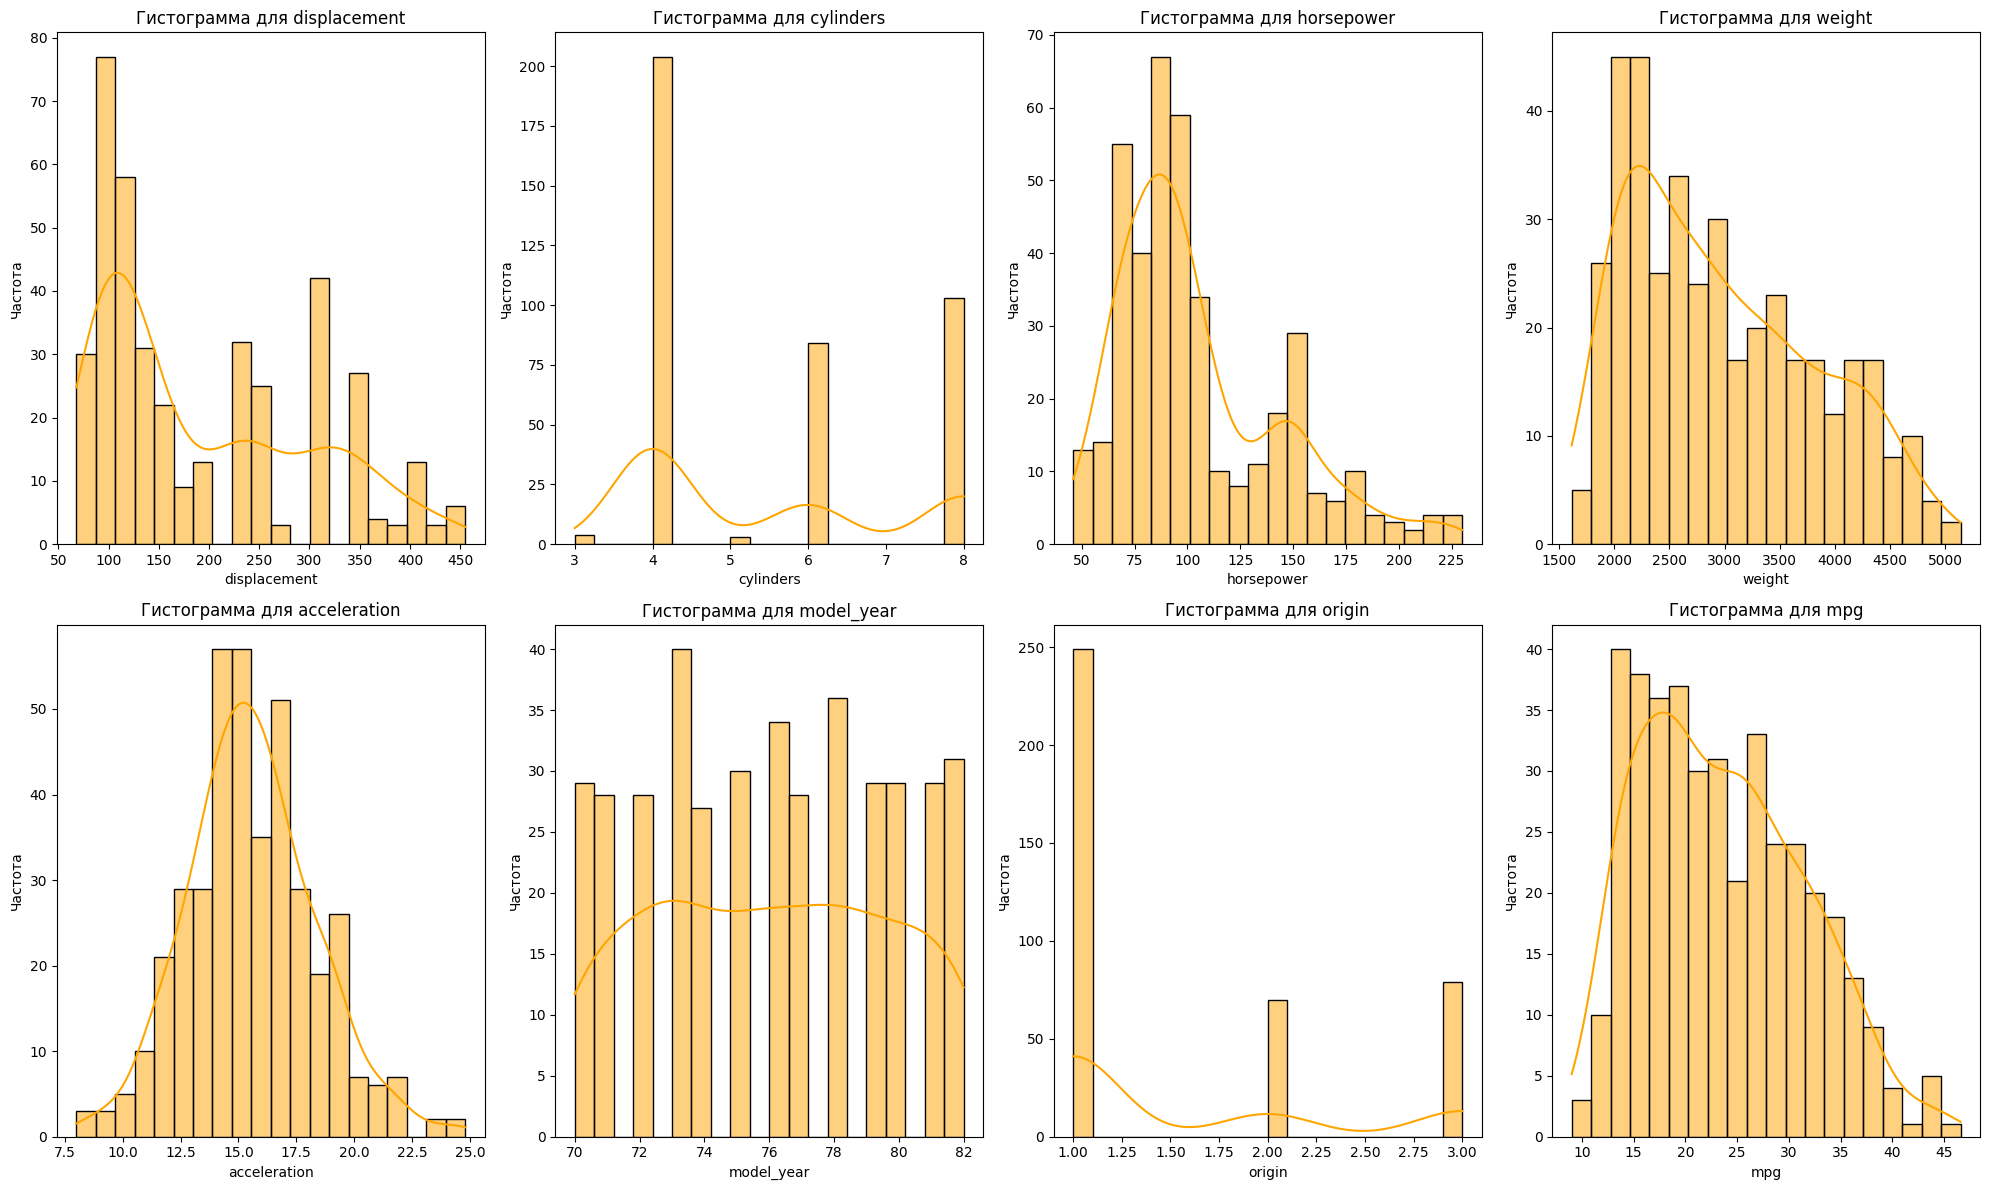

In [152]:
# Устанавливаем количество столбцов для графиков
n_cols = 4
n_rows = (len(df_optimized.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Построение гистограмм с KDE для числовых столбцов
for idx, col in enumerate(df_optimized.columns):
    sns.histplot(df_optimized[col], kde=True, ax=axes[idx], color='orange', bins=20)
    axes[idx].set_title(f'Гистограмма для {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')

# Удаляем пустые оси, если их больше, чем нужных
for i in range(len(df_optimized.columns), len(axes)):
    fig.delaxes(axes[i])



plt.tight_layout()
plt.show()


Проверка выбросов

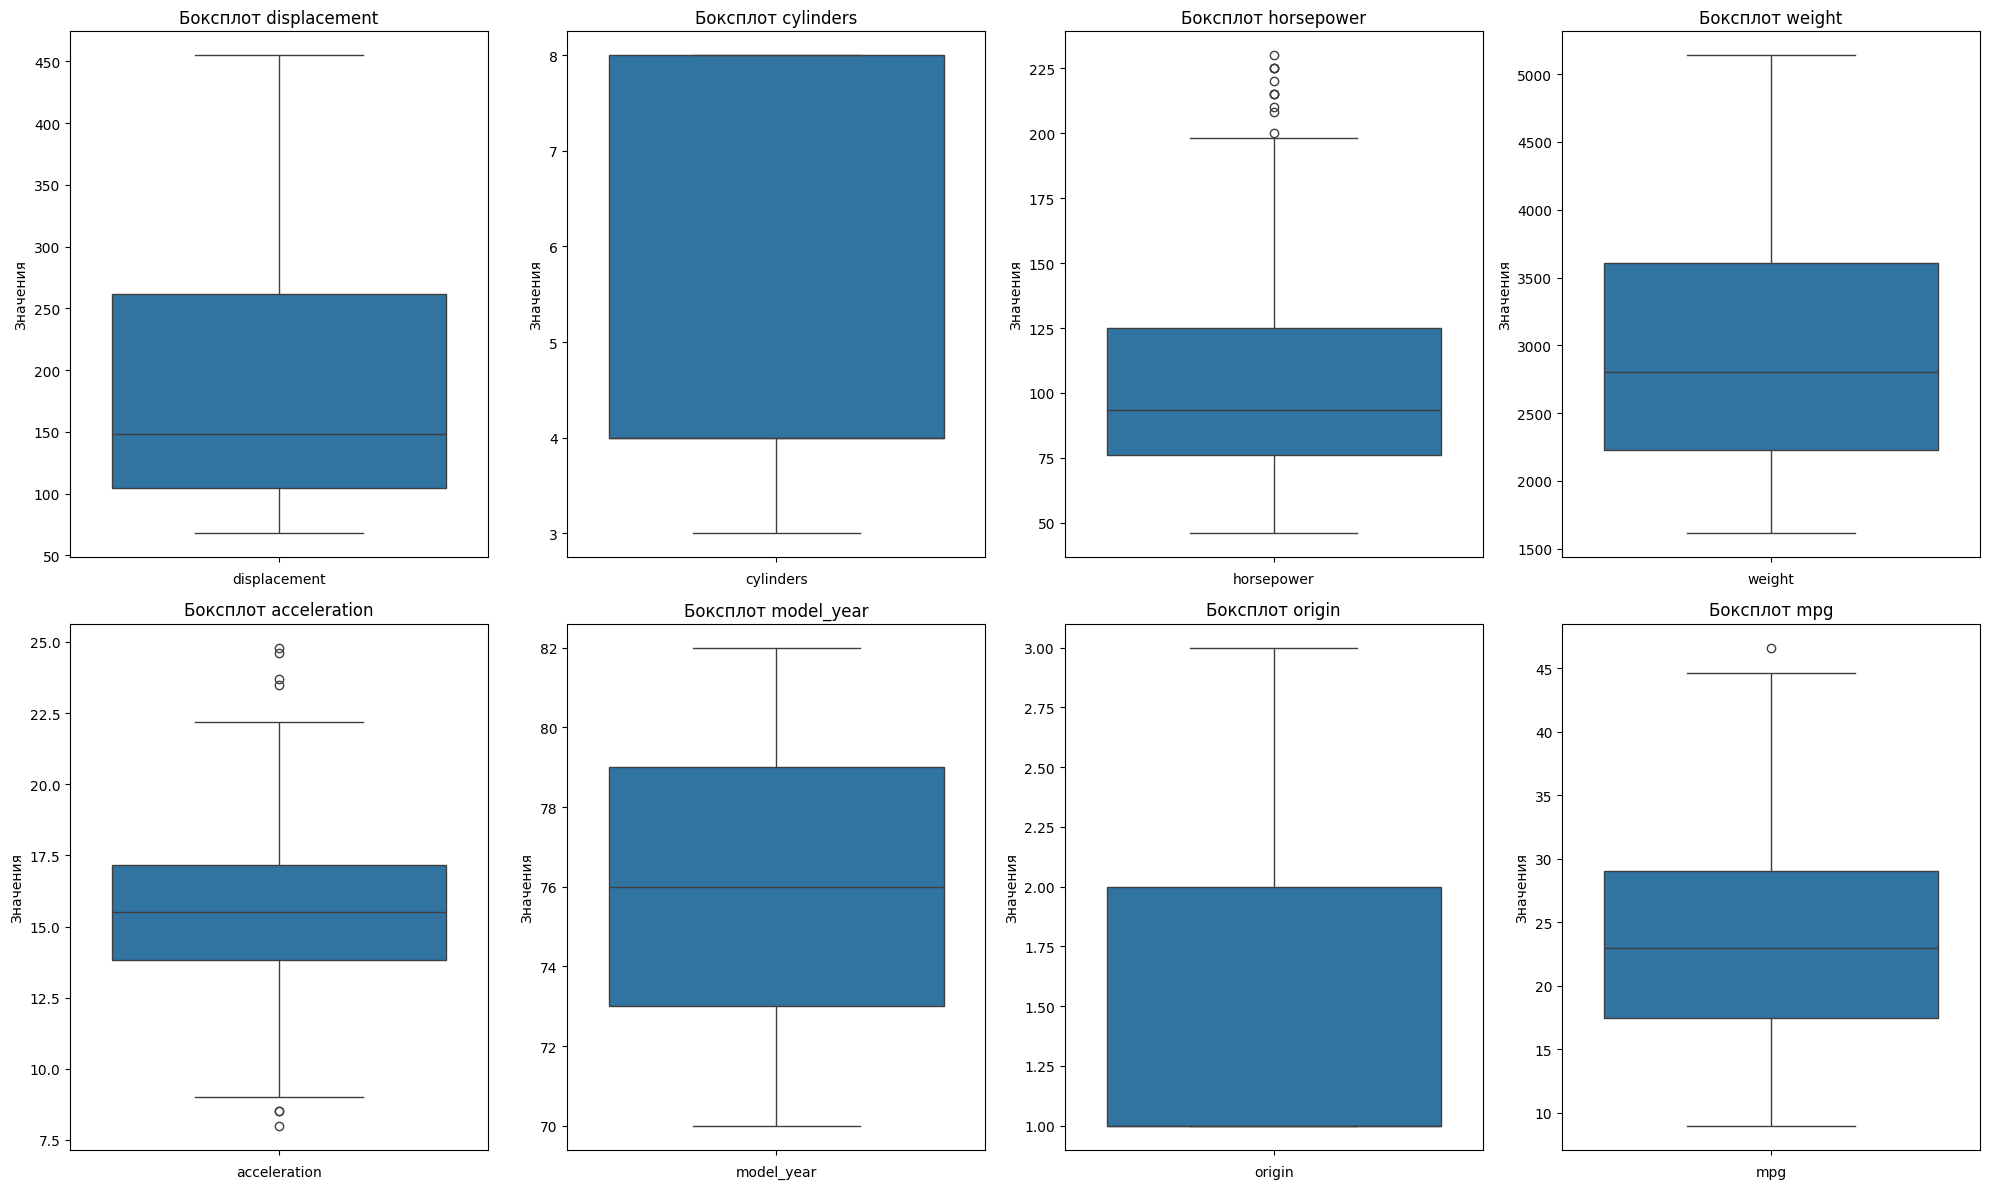

In [153]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Числовые столбцы для визуализации
numerical_columns = df_optimized.select_dtypes(include=['number']).columns

for idx, col in enumerate(numerical_columns):
    sns.boxplot(y=df_optimized[col], ax=axes[idx])
    axes[idx].set_title(f'Боксплот {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Значения')

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Выбросы есть в колонке horsepower и acceleration. Посмотрим, как данные кореллируют, чтобы определить какие выбросы можно удалить.

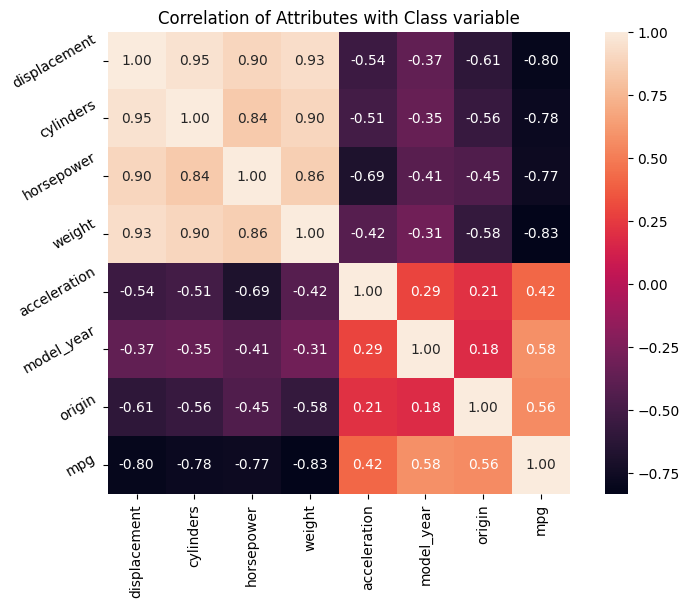

In [154]:
correlation = df_optimized.corr()

plt.figure(figsize=(9,6))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Данные сильно коррелирубт между собой

In [155]:
# Обработка выбросов
def remove_outliers(data, columns, threshold=1.5):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df_optimized = remove_outliers(df_optimized, df_optimized.columns)

In [156]:
X = df_optimized.drop(target_column, axis=1)
y = df_optimized[target_column]

Скалирование данных

In [157]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [158]:
new_X_train, new_X_valid, new_y_train, new_y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Решим проблему высокой корреляции данных

In [159]:
pca = PCA(n_components=new_X_train.shape[1])
pca.fit(new_X_train)

PCA(n_components=7)

Проверим сколько компонент дают 90% дисперсии

In [160]:
pca.explained_variance_ratio_.round(2)

array([0.64, 0.14, 0.11, 0.08, 0.02, 0.01, 0.  ])

Достаточно 4-ех компонент

### Обучение модели с новыми данными

Переопределим модель

In [161]:
model = Pipeline((
    ("pca", PCA(n_components=4)),
    ("model", KNeighborsRegressor(n_neighbors=3))
))

In [162]:
model.fit(new_X_train, new_y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('model', KNeighborsRegressor(n_neighbors=3))])

Сделаем предсказания

In [163]:
train_predict = model.predict(new_X_train)
valid_predict = model.predict(new_X_valid)

### Оценка качетсва модели с улучшеным бейзлайном

In [164]:
# Расчет метрик для тренировочных предсказаний
train_mae = mean_absolute_error(new_y_train, train_predict)
train_mape = mean_absolute_percentage_error(new_y_train, train_predict) * 100  # Преобразуем в проценты
train_r2 = r2_score(new_y_train, train_predict)
train_max_error = max_error(new_y_train, train_predict)

# Расчет метрик для валидационных предсказаний
valid_mae = mean_absolute_error(new_y_valid, valid_predict)
valid_mape = mean_absolute_percentage_error(new_y_valid, valid_predict) * 100  # Преобразуем в проценты
valid_r2 = r2_score(new_y_valid, valid_predict)
valid_max_error = max_error(new_y_valid, valid_predict)

# Сводка метрик в таблицу для удобного отображения
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MAPE (%)', 'R²', 'Max Error'],
    'Тренировочная выборка': [train_mae, train_mape, train_r2, train_max_error],
    'Валидационная выборка': [valid_mae, valid_mape, valid_r2, valid_max_error]
})

In [165]:
metrics_df.head()

,Метрика,Тренировочная выборка,Валидационная выборка
0,MAE,1.523465,2.055263
1,MAPE (%),6.294264,8.874318
2,R²,0.911702,0.860100
3,Max Error,12.733333,9.966667


### Резюме:
На качество модели повлияли, как входные данные, так и параметры самой модели:
- При помощи квантилей я удалил выбросы
- Скалировал данные StandartScaller'ом
- Избавился от высокой кореляции фичей
- Подобрал параметры моделей (кол-во соседей)

## 4. Имплементация алгоритма машинного обучения

### Реализация модели

In [166]:
class MyKNeighborsRegressor:
    def __init__(self, n_neighbors=5, weights="uniform"):
        self.n_neighbors = n_neighbors
        self.weights = weights

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        return self

    def predict(self, x):
        x = np.array(x)
        euclidean_distances = self._calc_euclidean_distances(self.X, x)
        indices = np.argsort(euclidean_distances, axis=0)[:self.n_neighbors, :]

        neighbors = self.y[indices]
        distances = np.take_along_axis(euclidean_distances, indices, axis=0)

        if self.weights == 'uniform':
            y = np.mean(neighbors, axis=0)
        elif self.weights == 'distance':
            weights = 1 / (distances + 1e-9)
            y = np.sum(neighbors * weights, axis=0) / np.sum(weights, axis=0)
        else:
            raise ValueError("weights must be 'uniform' or 'distance'")
        
        return y

    @staticmethod
    def _calc_euclidean_distances(data1, data2):
        diff = data1[:, np.newaxis, :] - data2[np.newaxis, :, :]
        squared_diff = diff ** 2
        euclidean_distances = np.sqrt(squared_diff.sum(axis=2))
        return euclidean_distances

### Обучение 

In [167]:
model = MyKNeighborsRegressor()
model.fit(X_train, y_train)

In [168]:
train_predict = model.predict(X_train)
valid_predict = model.predict(X_valid)

###  Оценка качества модели

In [169]:
# Расчет метрик для тренировочных предсказаний
train_mae = mean_absolute_error(y_train, train_predict)
train_mape = mean_absolute_percentage_error(y_train, train_predict) * 100  # Преобразуем в проценты
train_r2 = r2_score(y_train, train_predict)
train_max_error = max_error(y_train, train_predict)

# Расчет метрик для валидационных предсказаний
valid_mae = mean_absolute_error(y_valid, valid_predict)
valid_mape = mean_absolute_percentage_error(y_valid, valid_predict) * 100  # Преобразуем в проценты
valid_r2 = r2_score(y_valid, valid_predict)
valid_max_error = max_error(y_valid, valid_predict)

# Сводка метрик в таблицу для удобного отображения
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MAPE (%)', 'R²', 'Max Error'],
    'Тренировочная выборка': [train_mae, train_mape, train_r2, train_max_error],
    'Валидационная выборка': [valid_mae, valid_mape, valid_r2, valid_max_error]
})

In [170]:
metrics_df.head()

,Метрика,Тренировочная выборка,Валидационная выборка
0,MAE,2.603082,2.769250
1,MAPE (%),10.918482,12.350027
2,R²,0.798786,0.766000
3,Max Error,13.840000,9.080000


### Обучение с улучшенным бейзлайном

In [171]:
model = Pipeline((
    ("pca", PCA(n_components=4)),
    ("model", MyKNeighborsRegressor())
))

In [172]:
model.fit(new_X_train, new_y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('model',
                 <__main__.MyKNeighborsRegressor object at 0x0000024A6E5EDD30>)])

In [173]:
train_predict = model.predict(new_X_train)
valid_predict = model.predict(new_X_valid)

###  Оценка качества модели

In [174]:
# Расчет метрик для тренировочных предсказаний
train_mae = mean_absolute_error(new_y_train, train_predict)
train_mape = mean_absolute_percentage_error(new_y_train, train_predict) * 100  # Преобразуем в проценты
train_r2 = r2_score(new_y_train, train_predict)
train_max_error = max_error(new_y_train, train_predict)

# Расчет метрик для валидационных предсказаний
valid_mae = mean_absolute_error(new_y_valid, valid_predict)
valid_mape = mean_absolute_percentage_error(new_y_valid, valid_predict) * 100  # Преобразуем в проценты
valid_r2 = r2_score(new_y_valid, valid_predict)
valid_max_error = max_error(new_y_valid, valid_predict)

# Сводка метрик в таблицу для удобного отображения
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MAPE (%)', 'R²', 'Max Error'],
    'Тренировочная выборка': [train_mae, train_mape, train_r2, train_max_error],
    'Валидационная выборка': [valid_mae, valid_mape, valid_r2, valid_max_error]
})

In [175]:
metrics_df.head()

,Метрика,Тренировочная выборка,Валидационная выборка
0,MAE,1.712961,1.921579
1,MAPE (%),7.077152,8.450392
2,R²,0.891550,0.878337
3,Max Error,13.360000,9.800000


### Вывод:
- KNN не требует долгого обучения (метод fit просто подставлял входные данные)
- На маленьком датасете предсказание вычисляется довольно быстро, однако для более внушительных расчетов нужно оптимизировать метод перебора соседей
- Самописаная модель делает предсказания с точностью модели sklearn, что не может не радовать!